In [1]:
# Plot figures in the notebook (instead of a new window)
%matplotlib notebook

# Automatically reload modules
%load_ext autoreload
%autoreload 2        

# The usual imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# NumPy

**Task A**

In [2]:
num_samples, num_features = 10, 5

In [3]:
np.random.seed(10)
data = np.random.rand(num_samples, num_features)
print(data)

[[0.77132064 0.02075195 0.63364823 0.74880388 0.49850701]
 [0.22479665 0.19806286 0.76053071 0.16911084 0.08833981]
 [0.68535982 0.95339335 0.00394827 0.51219226 0.81262096]
 [0.61252607 0.72175532 0.29187607 0.91777412 0.71457578]
 [0.54254437 0.14217005 0.37334076 0.67413362 0.44183317]
 [0.43401399 0.61776698 0.51313824 0.65039718 0.60103895]
 [0.8052232  0.52164715 0.90864888 0.31923609 0.09045935]
 [0.30070006 0.11398436 0.82868133 0.04689632 0.62628715]
 [0.54758616 0.819287   0.19894754 0.8568503  0.35165264]
 [0.75464769 0.29596171 0.88393648 0.32551164 0.1650159 ]]


In [4]:
def standardize(x):
    centered_x = x - np.mean(x, axis=0)
    std_x = centered_x / np.std(x, axis=0)
    # std_x = centered_x / np.std(centered_x, axis=0)
    
    return std_x

In [5]:
std_data = standardize(data)
print(std_data, "\n\n", np.mean(std_data, axis=0), "\n\n", np.std(std_data, axis=0))

[[ 1.0775774  -1.34411605  0.31525355  0.80665878  0.24128662]
 [-1.81711634 -0.77630186  0.74088404 -1.25592235 -1.42276759]
 [ 0.62228127  1.64254169 -1.797091   -0.03521894  1.51565143]
 [ 0.23651339  0.90075228 -0.83122987  1.40786459  1.11788073]
 [-0.13414844 -0.95529104 -0.55795449  0.54097769  0.01136005]
 [-0.70898541  0.56774371 -0.08900028  0.45652209  0.65726018]
 [ 1.2571441   0.25993298  1.23775021 -0.72176808 -1.4141686 ]
 [-1.41508984 -1.04555188  0.96949701 -1.69076861  0.75969247]
 [-0.10744434  1.21308427 -1.14296098  1.19109415 -0.35450368]
 [ 0.98926822 -0.46279408  1.15485183 -0.69943932 -1.11169162]] 

 [-1.66533454e-16  4.99600361e-17 -2.22044605e-17  1.11022302e-17
  3.33066907e-16] 

 [1. 1. 1. 1. 1.]


**Task B**

In [6]:
np.random.seed(10)
p, q = (np.random.rand(i, 2) for i in (4, 5))
p_big, q_big = (np.random.rand(i, 80) for i in (100, 120))

print(p, "\n\n", q)

[[0.77132064 0.02075195]
 [0.63364823 0.74880388]
 [0.49850701 0.22479665]
 [0.19806286 0.76053071]] 

 [[0.16911084 0.08833981]
 [0.68535982 0.95339335]
 [0.00394827 0.51219226]
 [0.81262096 0.61252607]
 [0.72175532 0.29187607]]


In [7]:
def distance(p, q):
    rows, cols = np.indices((p.shape[0], q.shape[0]))
    distances = np.sqrt(np.sum((p[rows.ravel(), :] - q[cols.ravel(), :])**2, axis=1))
    
    return distances.reshape((p.shape[0], q.shape[0]))

In [8]:
Q = distance(p, q)
print(Q)

[[0.60599073 0.93659449 0.91124856 0.59321356 0.27561751]
 [0.80746999 0.21102354 0.67268649 0.22495084 0.46534491]
 [0.35654215 0.75217493 0.57200052 0.49900068 0.23310825]
 [0.67281411 0.52407472 0.31520226 0.63212897 0.70277376]]


**Task C**

In [9]:
from numpy.random import rand, randn

In [10]:
n, d, k = 100, 2, 2

In [11]:
np.random.seed(20)
X = rand(n, d)

# means = [rand(d)  for _ in range(k)]  # works for any k
means = [rand(d) * 0.5 + 0.5 , - rand(d)  * 0.5 + 0.5]  # for better plotting when k = 2

S = np.diag(rand(d))

sigmas = [S]*k # we'll use the same Sigma for all clusters for better visual results

print(means)
print(sigmas)

[array([0.69872366, 0.75176984]), array([0.25997411, 0.14504062])]
[array([[0.01764816, 0.        ],
       [0.        , 0.06360523]]), array([[0.01764816, 0.        ],
       [0.        , 0.06360523]])]


In [12]:
def compute_log(X, mean, sigma):
    d = len(X[0])
    dxm = X - mean
    exp = -0.5 * np.sum(dxm * np.dot(dxm, np.linalg.inv(sigma)), axis=1)
    return exp - np.log(2 * np.pi) * (d/2) - 0.5 * np.log(np.linalg.det(sigma))

In [13]:
logs = [compute_log(X, m, s) for m, s in zip(means, sigmas)]
#print(logs)

In [14]:
assignments = np.argmax(logs, axis=0)
print(assignments)

[0 0 1 1 0 1 0 0 1 1 0 1 0 0 0 0 1 0 1 1 0 1 1 1 0 0 0 0 0 1 1 0 0 1 1 0 0
 1 0 1 1 1 1 0 1 0 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 0 1
 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0]


['red' 'red' 'green' 'green' 'red' 'green' 'red' 'red' 'green' 'green'
 'red' 'green' 'red' 'red' 'red' 'red' 'green' 'red' 'green' 'green' 'red'
 'green' 'green' 'green' 'red' 'red' 'red' 'red' 'red' 'green' 'green'
 'red' 'red' 'green' 'green' 'red' 'red' 'green' 'red' 'green' 'green'
 'green' 'green' 'red' 'green' 'red' 'green' 'red' 'red' 'red' 'red'
 'green' 'red' 'green' 'green' 'red' 'red' 'red' 'red' 'green' 'red'
 'green' 'red' 'red' 'green' 'red' 'red' 'red' 'green' 'red' 'green' 'red'
 'red' 'green' 'red' 'green' 'green' 'red' 'red' 'green' 'green' 'red'
 'red' 'red' 'red' 'green' 'red' 'red' 'red' 'red' 'red' 'green' 'red'
 'green' 'red' 'red' 'red' 'green' 'red' 'red']


<IPython.core.display.Javascript object>


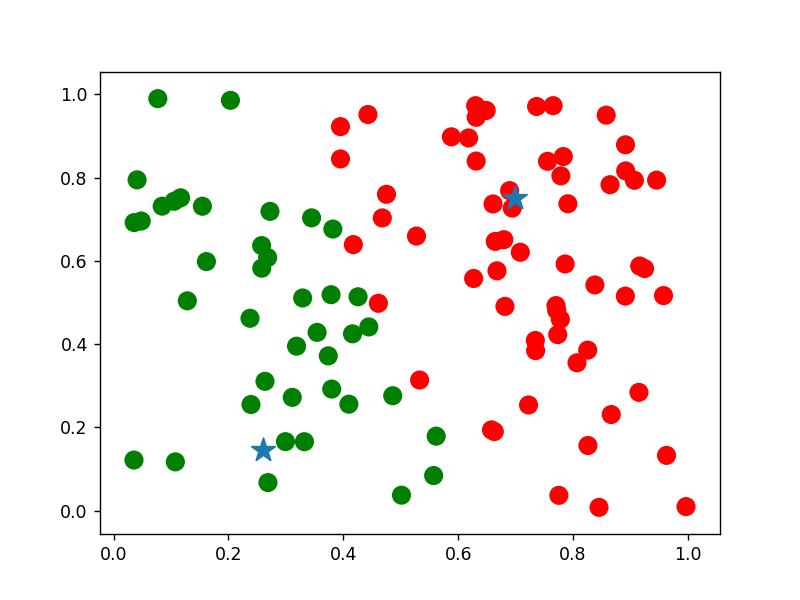

In [15]:
colors = np.array(['red', 'green'])[assignments]
print(colors)
plt.scatter(X[:, 0], X[:, 1], c=colors, s=100)
plt.scatter(np.array(means)[:, 0], np.array(means)[:, 1], marker='*', s=200)